In [2]:
# Useful imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os #enable to read all files in doc automatically
sns.set_context('notebook')

In [3]:
# Importing the csv file
testCsv = pd.read_csv('test.csv', sep=",", header=0)
# See what the data looks like
testCsv.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [4]:
# Importing the csv file
trainCsv = pd.read_csv('train.csv', sep=",", header=0)
# See what the data looks like
trainCsv['Prediction'] = trainCsv['Prediction'].map({'s': 1, 'b': 0})
trainCsv.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,0,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,0,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,0,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,0,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Correlation on train

Here we can see the correlation between values in cells in the trianing set.

In [32]:
SPLITROWS = 1000

# the big table, which is usually bigger
bigdata = trainCsv

numrows = bigdata.shape[0]

# subtract means form the input data
bigdata -= np.mean(bigdata, axis=1)[:,None]

# normalize the data
bigdata /= np.sqrt(np.sum(bigdata*bigdata, axis=1))[:,None]

# reserve the resulting table onto HDD
res = np.memmap("/tmp/mydata.dat", 'float64', mode='w+', shape=(numrows, numrows))

for r in range(0, numrows, SPLITROWS):
    for c in range(0, numrows, SPLITROWS):
        r1 = r + SPLITROWS
        c1 = c + SPLITROWS
        chunk1 = bigdata[r:r1]
        chunk2 = bigdata[c:c1]
        res[r:r1, c:c1] = np.dot(chunk1, chunk2.T)

#train_corr = trainCsv[trainCsv.columns[1:]].corr()
res

ValueError: Unable to coerce to DataFrame, shape must be (250000, 32): given (32, 1)

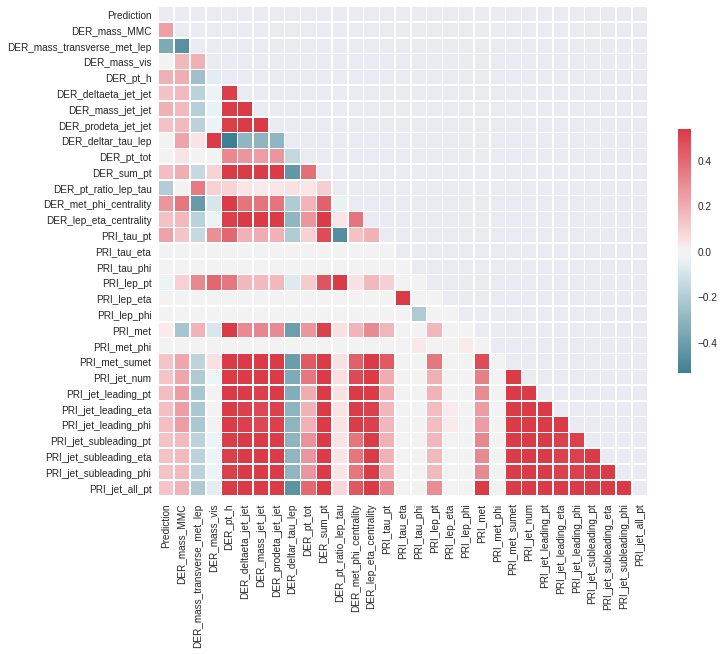

In [30]:
#Keep only bottom triangle
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Attention!!

DER est dérivé de PRI, donc c'est normal qu'ils aient uen forte correlation!!!!!!

### Test corr

In [22]:
test_corr = testCsv[testCsv.columns[1:]].corr()
test_corr

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
DER_mass_MMC,1.000000,-0.454687,0.173097,0.199962,0.163885,0.161923,0.163738,0.232466,0.045190,0.202030,...,0.007424,0.222026,0.221683,0.249558,0.246367,0.246365,0.164104,0.163840,0.163837,0.186204
DER_mass_transverse_met_lep,-0.454687,1.000000,0.190261,-0.252314,-0.179995,-0.193043,-0.179558,0.039064,0.011608,-0.146077,...,-0.018506,-0.166341,-0.212148,-0.228561,-0.219260,-0.219251,-0.180443,-0.179847,-0.179839,-0.210731
DER_mass_vis,0.173097,0.190261,1.000000,-0.062134,-0.029582,-0.037312,-0.029471,0.576132,-0.001481,0.091197,...,-0.003474,0.057713,-0.024343,-0.015229,-0.009848,-0.009836,-0.030455,-0.029547,-0.029539,-0.050174
DER_pt_h,0.199962,-0.252314,-0.062134,1.000000,0.522688,0.532228,0.522689,-0.543396,0.302274,0.833617,...,0.009842,0.784183,0.623523,0.623694,0.566963,0.566955,0.530724,0.522747,0.522746,0.808229
DER_deltaeta_jet_jet,0.163885,-0.179995,-0.029582,0.522688,1.000000,0.945823,0.999981,-0.299040,0.282022,0.671123,...,0.006433,0.617472,0.868103,0.546749,0.523594,0.523595,0.999318,0.999995,0.999996,0.711387
DER_mass_jet_jet,0.161923,-0.193043,-0.037312,0.532228,0.945823,1.000000,0.944216,-0.302572,0.259253,0.679696,...,0.006817,0.614925,0.814400,0.523099,0.494948,0.494949,0.947485,0.945285,0.945289,0.718618
DER_prodeta_jet_jet,0.163738,-0.179558,-0.029471,0.522689,0.999981,0.944216,1.000000,-0.299073,0.282584,0.671306,...,0.006416,0.617791,0.868327,0.546746,0.523591,0.523591,0.999319,0.999988,0.999989,0.711583
DER_deltar_tau_lep,0.232466,0.039064,0.576132,-0.543396,-0.299040,-0.302572,-0.299073,1.000000,-0.158079,-0.432674,...,-0.005582,-0.406430,-0.349113,-0.336464,-0.304889,-0.304867,-0.303347,-0.299085,-0.299079,-0.447847
DER_pt_tot,0.045190,0.011608,-0.001481,0.302274,0.282022,0.259253,0.282584,-0.158079,1.000000,0.397784,...,-0.000420,0.466815,0.374249,0.208513,0.191280,0.191286,0.290872,0.282241,0.282247,0.420791
DER_sum_pt,0.202030,-0.146077,0.091197,0.833617,0.671123,0.679696,0.671306,-0.432674,0.397784,1.000000,...,0.007854,0.905406,0.757593,0.639194,0.579099,0.579098,0.687069,0.671259,0.671262,0.965718


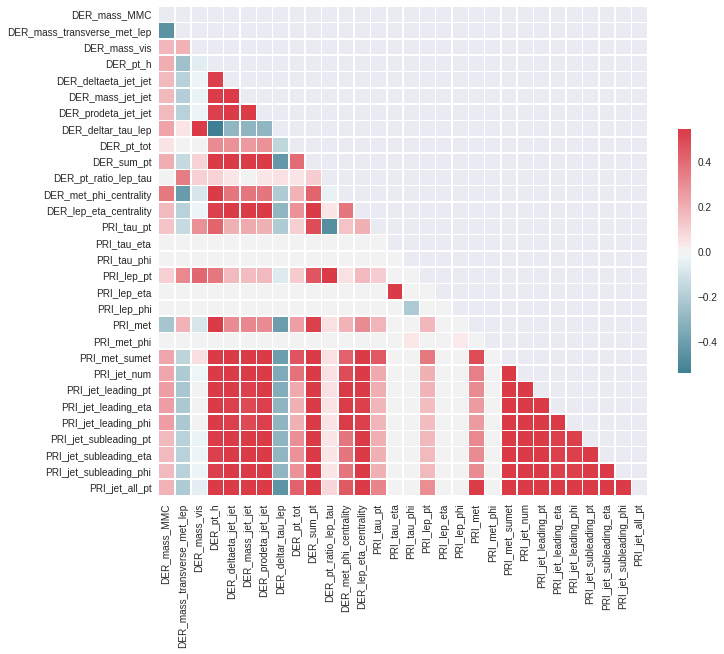

In [23]:
#Keep only bottom triangle
mask = np.zeros_like(test_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(test_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()